In [1]:
import pandas as pd 
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset using datasets library
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()

In [3]:
top6_job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [6]:
df_US_top6 = df_US[df_US['job_title_short'].isin(top6_job_titles)]

In [22]:
order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

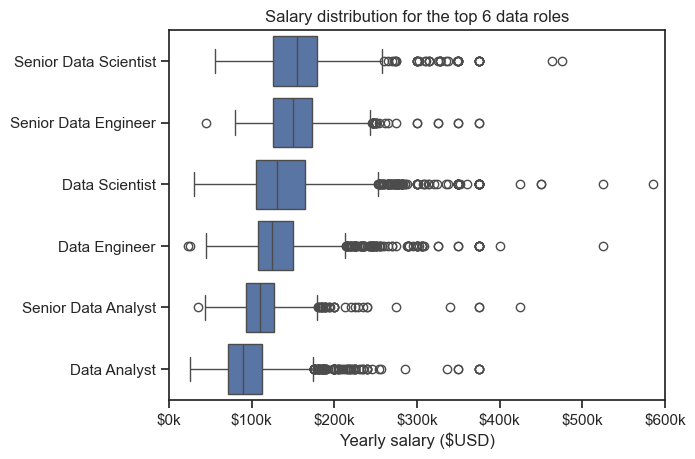

In [23]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=order)
sns.set_theme(style='ticks')

plt.title('Salary distribution for the top 6 data roles')
plt.ylabel('')
plt.xlabel('Yearly salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, __: f'${int(x/1000)}k'))
plt.show()



#Investigating Median Salary VS Skill for Data Analyst

In [24]:
df_DA_US_salary = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US_salary = df_DA_US_salary.dropna(subset=['salary_year_avg'])

df_DA_US_salary = df_DA_US_salary.explode('job_skills')
df_DA_US_grouped = df_DA_US_salary.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_pay = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)
df_DA_US_count = df_DA_US_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)


In [25]:
df_DA_US_count

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


In [26]:
df_DA_US_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


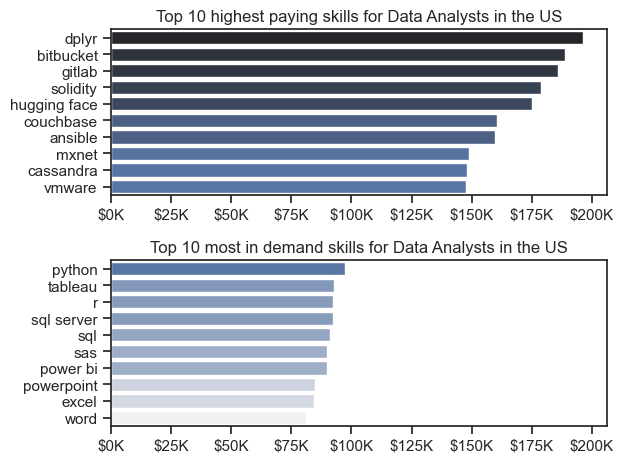

In [27]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')
sns.barplot(data=df_DA_US_pay, x='median', y=df_DA_US_pay.index, ax=ax[0],hue='median', palette='dark:b_r', legend=False)
ax[0].set_title('Top 10 highest paying skills for Data Analysts in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=df_DA_US_count, x='median', y=df_DA_US_count.index, ax=ax[1], hue='median', palette='light:b', legend=False)
ax[1].set_title('Top 10 most in demand skills for Data Analysts in the US')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
fig.tight_layout()